In [14]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df = pd.read_csv('base_datos_2008.csv', nrows=1e5)

In [2]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2008,1,25,5,2204.0,1935,106.0,2257,XE,7676,...,4.0,17.0,0,NaN,0,0.0,0.0,0.0,0.0,129.0
99996,2008,1,26,6,1933.0,1935,2234.0,2257,XE,7676,...,4.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
99997,2008,1,27,7,2047.0,1935,2400.0,2257,XE,7676,...,6.0,18.0,0,NaN,0,23.0,0.0,0.0,0.0,40.0
99998,2008,1,28,1,1956.0,1935,2308.0,2257,XE,7676,...,5.0,25.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [4]:
newdf=df[["AirTime","DepDelay"]].dropna()

In [15]:
newdf=df[["AirTime","DepDelay","Distance","TaxiOut","ArrDelay"]].dropna()

In [16]:
newdf

,AirTime,DepDelay,Distance,TaxiOut,ArrDelay
0,116.0,8.0,810,8.0,-14.0
1,113.0,19.0,810,10.0,2.0
2,76.0,8.0,515,17.0,14.0
3,78.0,-4.0,515,7.0,-6.0
4,77.0,34.0,515,10.0,34.0
...,...,...,...,...,...
99995,101.0,149.0,866,17.0,129.0
99996,101.0,-2.0,866,16.0,-23.0
99997,109.0,72.0,866,18.0,63.0
99998,102.0,21.0,866,25.0,11.0


In [17]:
#el numero de cluster puede ser 2 o 3 o 100
#jobs permite utilizar todos los procesadores que se tienen en el ordenador
kmeans= KMeans(n_clusters=4,random_state=0,n_jobs=-1).fit(newdf)

In [18]:
#es un array que nos indica a que cluster pertenece cada una de las observaciones 
kmeans.labels_

array([3, 3, 3, ..., 3, 3, 3])

In [19]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2, 3]), array([53716, 15312,  7770, 21900], dtype=int64))

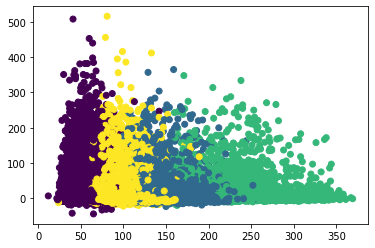

In [20]:
#podemos visualizar que tenemos dos grupos bien cerca 
plt.scatter(newdf.AirTime,newdf.DepDelay,c=kmeans.labels_)
plt.show()

In [10]:
#donde quedan ubicados los centroides 
kmeans.cluster_centers_

array([[ 79.58747465, 116.67976673],
       [127.97481669,   5.1374333 ],
       [ 58.86818317,   5.67491143],
       [224.43791401,   9.97446706]])

In [11]:
#vamos a cargar 1 millon de registros ejemplo pueden ser nuevos clientes y vamos a predecir a que grupo pertenecen 
df = pd.read_csv('base_datos_2008.csv', nrows=1e6)[["AirTime","DepDelay"]].dropna()

In [13]:
#50 primeras filas 
kmeans.predict(df)[0:50]

array([1, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 0, 2, 2, 2, 2, 3, 3, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0])